# Lending Club Data Analysis

These data set contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The data set is a matrix of about 890 thousand observations and 75 variables. A data dictionary is provided in a separate file. 

In [1]:
# Data: https://www.kaggle.com/wendykan/lending-club-loan-data/data
loan <- read.csv("loan.csv", stringsAsFactors = FALSE)
loanT <- loan

# Data structure

In [2]:
# Understand the data
summary(loan)

       id             member_id          loan_amnt      funded_amnt   
 Min.   :   54734   Min.   :   70473   Min.   :  500   Min.   :  500  
 1st Qu.: 9206643   1st Qu.:10877134   1st Qu.: 8000   1st Qu.: 8000  
 Median :34433267   Median :37095283   Median :13000   Median :13000  
 Mean   :32465133   Mean   :35001825   Mean   :14755   Mean   :14742  
 3rd Qu.:54908135   3rd Qu.:58471347   3rd Qu.:20000   3rd Qu.:20000  
 Max.   :68617057   Max.   :73544841   Max.   :35000   Max.   :35000  
                                                                      
 funded_amnt_inv     term              int_rate      installment     
 Min.   :    0   Length:887379      Min.   : 5.32   Min.   :  15.67  
 1st Qu.: 8000   Class :character   1st Qu.: 9.99   1st Qu.: 260.70  
 Median :13000   Mode  :character   Median :12.99   Median : 382.55  
 Mean   :14702                      Mean   :13.25   Mean   : 436.72  
 3rd Qu.:20000                      3rd Qu.:16.20   3rd Qu.: 572.60  
 Max.   :350

In [3]:
#data structure
str(loan)

'data.frame':	887379 obs. of  74 variables:
 $ id                         : int  1077501 1077430 1077175 1076863 1075358 1075269 1069639 1072053 1071795 1071570 ...
 $ member_id                  : int  1296599 1314167 1313524 1277178 1311748 1311441 1304742 1288686 1306957 1306721 ...
 $ loan_amnt                  : num  5000 2500 2400 10000 3000 ...
 $ funded_amnt                : num  5000 2500 2400 10000 3000 ...
 $ funded_amnt_inv            : num  4975 2500 2400 10000 3000 ...
 $ term                       : chr  " 36 months" " 60 months" " 36 months" " 36 months" ...
 $ int_rate                   : num  10.6 15.3 16 13.5 12.7 ...
 $ installment                : num  162.9 59.8 84.3 339.3 67.8 ...
 $ grade                      : chr  "B" "C" "C" "C" ...
 $ sub_grade                  : chr  "B2" "C4" "C5" "C1" ...
 $ emp_title                  : chr  "" "Ryder" "" "AIR RESOURCES BOARD" ...
 $ emp_length                 : chr  "10+ years" "< 1 year" "10+ years" "10+ years" ...
 $ ho

In [5]:
#data dimension
dim(loan)

[1] 887379     74

In [6]:
#top 6 rows
head(loan)

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [17]:
loan_names <- colnames(loan)
loan_names

[1] "id"                          "member_id"                  
 [3] "loan_amnt"                   "funded_amnt"                
 [5] "funded_amnt_inv"             "term"                       
 [7] "int_rate"                    "installment"                
 [9] "grade"                       "sub_grade"                  
[11] "emp_title"                   "emp_length"                 
[13] "home_ownership"              "annual_inc"                 
[15] "verification_status"         "issue_d"                    
[17] "loan_status"                 "pymnt_plan"                 
[19] "url"                         "desc"                       
[21] "purpose"                     "title"                      
[23] "zip_code"                    "addr_state"                 
[25] "dti"                         "delinq_2yrs"                
[27] "earliest_cr_line"            "inq_last_6mths"             
[29] "mths_since_last_delinq"      "mths_since_last_record"     
[31] "open_acc"                    "pub_rec"                    
[33] "revol_bal"                   "revol_util"                 
[35] "total_acc"                   "initial_list_status"        
[37] "out_prncp"                   "out_prncp_inv"              
[39] "total_pymnt"                 "total_pymnt_inv"            
[41] "total_rec_prncp"             "total_rec_int"              
[43] "total_rec_late_fee"          "recoveries"                 
[45] "collection_recovery_fee"     "last_pymnt_d"               
[47] "last_pymnt_amnt"             "next_pymnt_d"               
[49] "last_credit_pull_d"          "collections_12_mths_ex_med" 
[51] "mths_since_last_major_derog" "policy_code"                
[53] "application_type"            "annual_inc_joint"           
[55] "dti_joint"                   "verification_status_joint"  
[57] "acc_now_delinq"              "tot_coll_amt"               
[59] "tot_cur_bal"                 "open_acc_6m"                
[61] "open_il_6m"                  "open_il_12m"                
[63] "open_il_24m"                 "mths_since_rcnt_il"         
[65] "total_bal_il"                "il_util"                    
[67] "open_rv_12m"                 "open_rv_24m"                
[69] "max_bal_bc"                  "all_util"                   
[71] "total_rev_hi_lim"            "inq_fi"                     
[73] "total_cu_tl"                 "inq_last_12m"

In [8]:
# Check dictionary and cluster features into groups for better understanding.
length(unique(loan$id))

[1] 887379

unique id equals to the number of rows of data set(no two same id)

In [9]:
length(unique(loan$member_id))

[1] 887379

unique member-id equals to the number of rows of data set(no two same id)

# Meaning of data fields

In [15]:
#data dictionary
library(readxl)
dataDictionary <- read_excel("LCDataDictionary.xlsx")
dataDictionary

LoanStatNew,Description
addr_state,The state provided by the borrower in the loan application
annual_inc,The self-reported annual income provided by the borrower during registration.
annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
collection_recovery_fee,post charge off collection fee
collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
desc,Loan description provided by the borrower
dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


In [18]:
#some data fields do not exist in the data dictionary
dd_names <- as.character(na.omit(dataDictionary$LoanStatNew))
setdiff(dd_names, loan_names)

[1] "fico_range_high"       "fico_range_low"        "is_inc_v"             
[4] "last_fico_range_high"  "last_fico_range_low"   "verified_status_joint"
[7] "total_rev_hi_lim  "

# Missing data

In [20]:
#Check the missing value of this data set
num.NA <- sort(sapply(loan, function(x) {sum(is.na(x))}), decreasing=TRUE)
sum(is.na(loan)) / (nrow(loan) *ncol(loan))

[1] 0.2434001

#How to deal with missing data
#(1) Remove features with too many missing value, 
     or remove all rows with NA if you have a lot of data
#(2) If not missing at random, add new level to represent NA, impute with 0,
     or generate new feature.
#(3) If missing at random, imputation using summary stats or modeling way.


In [38]:
dfnum.NA <- data.frame(name=names(num.NA), per50 = num.NA/nrow(loan)>=0.5,percentage=num.NA/dim(loan)[1], row.names = NULL)
head(dfnum.NA)

name,per50,percentage
dti_joint,TRUE,0.9994264
annual_inc_joint,TRUE,0.9994241
il_util,TRUE,0.9790202
mths_since_rcnt_il,TRUE,0.9765489
open_acc_6m,TRUE,0.9759156
open_il_6m,TRUE,0.9759156


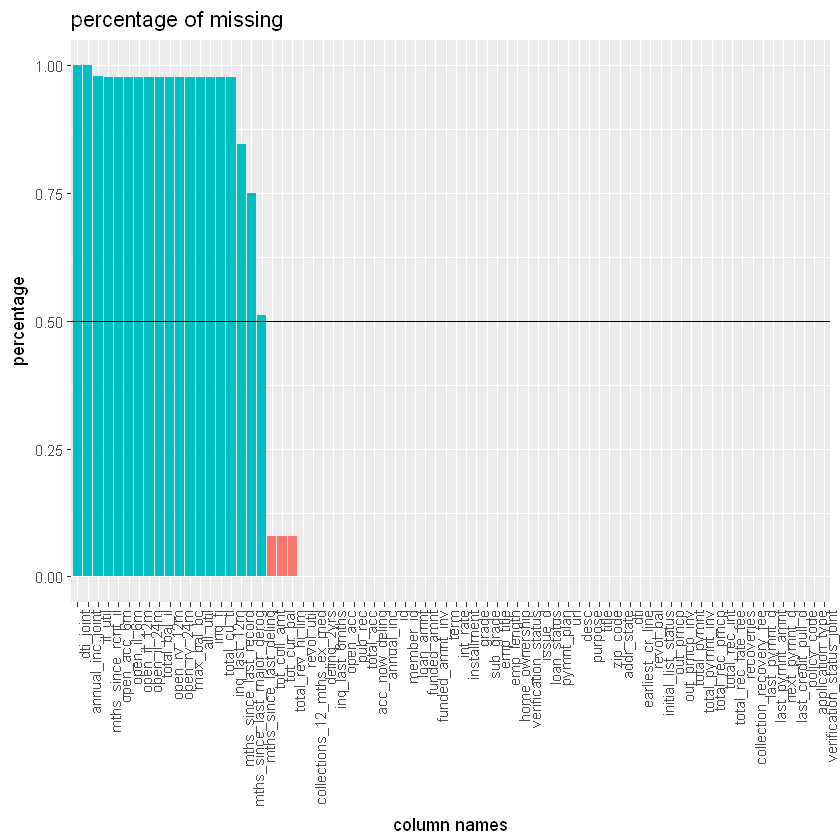

In [39]:
library(ggplot2)
ggplot(data = dfnum.NA, aes(x=name, y=percentage)) + 
  geom_bar(aes(fill=per50), stat="identity") + 
  scale_x_discrete(name ="column names", 
                   limits=dfnum.NA$name)+
  theme(axis.text.x = element_text(angle=90, hjust=1, vjust=1),
        legend.position = "none") +
  geom_hline(yintercept = 0.5) + 
  ggtitle("percentage of missing")

In [41]:
#drop the fields which have more than 50% missing value
remain.col <- names(num.NA)[which(num.NA <= 0.5 * dim(loan)[1])]
loan <- loan[, remain.col]

# Data Exploration

 How do we explore data?
  1) Numeric variables
  2) Categorical variables
  3) Numeric variable with numerical response
  4) Categorical variable with numerical response
  5) Numeric varialbe with categorical response
  6) Categorical variable with categorical response

In [48]:
#target variable-- interest rate
response = loan$int_rate
features = loan[, -which(colnames(loan)=="int_rate")]
colnames(features)

[1] "tot_coll_amt"               "tot_cur_bal"               
 [3] "total_rev_hi_lim"           "revol_util"                
 [5] "collections_12_mths_ex_med" "delinq_2yrs"               
 [7] "inq_last_6mths"             "open_acc"                  
 [9] "pub_rec"                    "total_acc"                 
[11] "acc_now_delinq"             "annual_inc"                
[13] "id"                         "member_id"                 
[15] "loan_amnt"                  "funded_amnt"               
[17] "funded_amnt_inv"            "term"                      
[19] "installment"                "grade"                     
[21] "sub_grade"                  "emp_title"                 
[23] "emp_length"                 "home_ownership"            
[25] "verification_status"        "issue_d"                   
[27] "loan_status"                "pymnt_plan"                
[29] "url"                        "desc"                      
[31] "purpose"                    "title"                     
[33] "zip_code"                   "addr_state"                
[35] "dti"                        "earliest_cr_line"          
[37] "revol_bal"                  "initial_list_status"       
[39] "out_prncp"                  "out_prncp_inv"             
[41] "total_pymnt"                "total_pymnt_inv"           
[43] "total_rec_prncp"            "total_rec_int"             
[45] "total_rec_late_fee"         "recoveries"                
[47] "collection_recovery_fee"    "last_pymnt_d"              
[49] "last_pymnt_amnt"            "next_pymnt_d"              
[51] "last_credit_pull_d"         "policy_code"               
[53] "application_type"           "verification_status_joint"

In [51]:
# numeric variables
mean(loan$int_rate)
sd(loan$int_rate)
median(loan$int_rate)
quantile(loan$int_rate, c(0.1, 0.25, 0.5, 0.75, 0.9))

[1] 13.24674

[1] 4.381867

[1] 12.99

10%   25%   50%   75%   90% 
 7.69  9.99 12.99 16.20 18.99

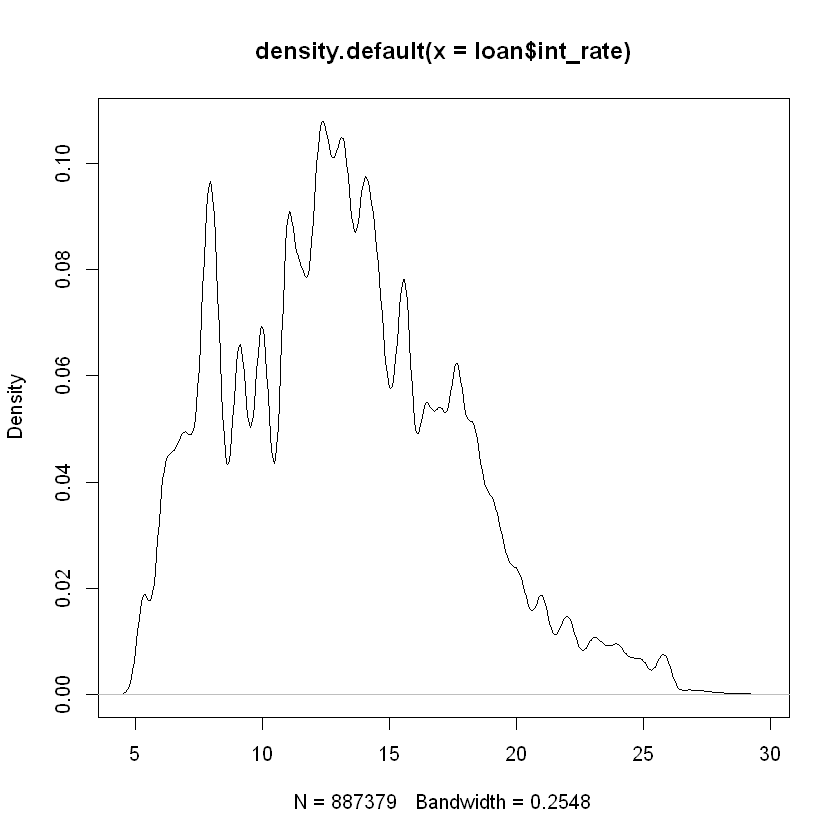

In [52]:
plot(density(loan$int_rate))

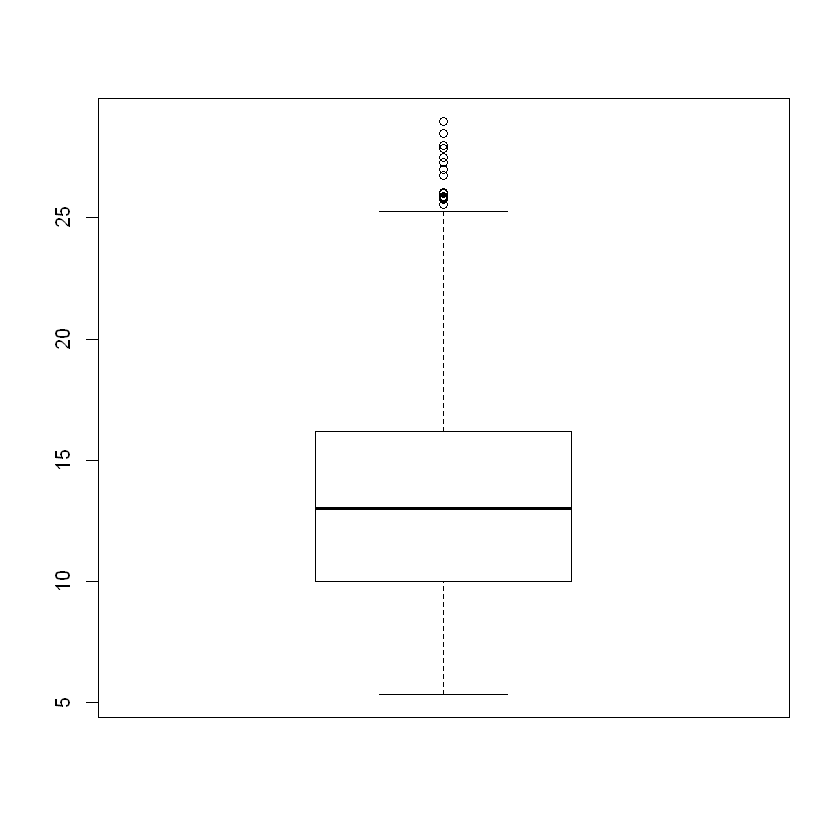

In [53]:
# Q1 - 1.5IQR, Q1, median, Q3, Q3 + 1.5IQR, where IQR is interquartile range: Q3 - Q1
boxplot(loan$int_rate)

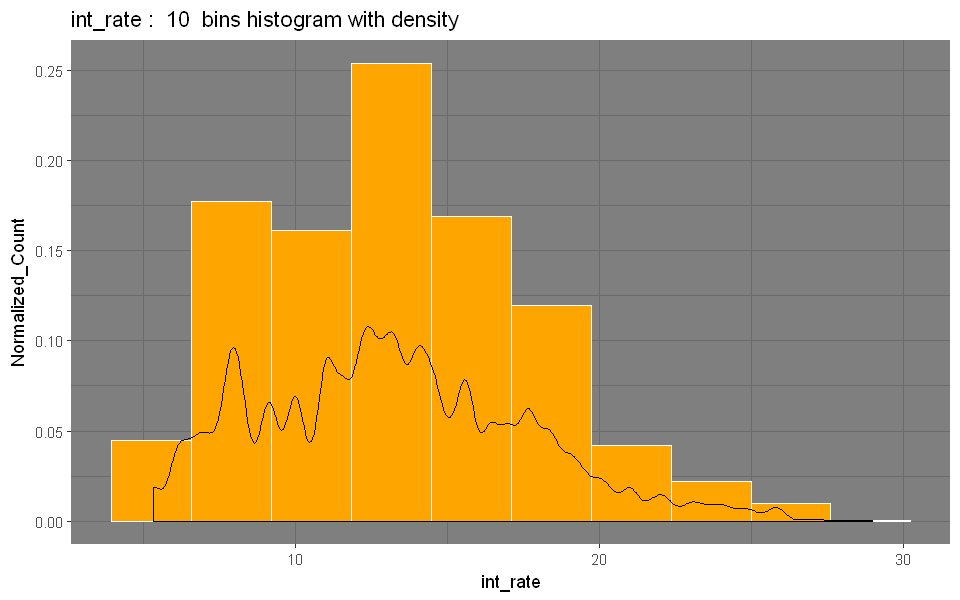

In [72]:
plothistdensity <- function(data, nbins){
    options(repr.plot.width=8, repr.plot.height=5)
    p <- ggplot(data, aes(x=int_rate, y = ..density..))
    p <- p + geom_histogram(aes(y=..count../sum(..count..)),
                           bins = nbins,
                           color = "white",
                           fill="orange")
    p <- p + geom_density()
    p + theme_dark() + 
    ylab("Normalized_Count") + 
    ggtitle(paste(paste("int_rate : ", nbins), " bins histogram with density" ))  
}
plothistdensity(loan, 10)

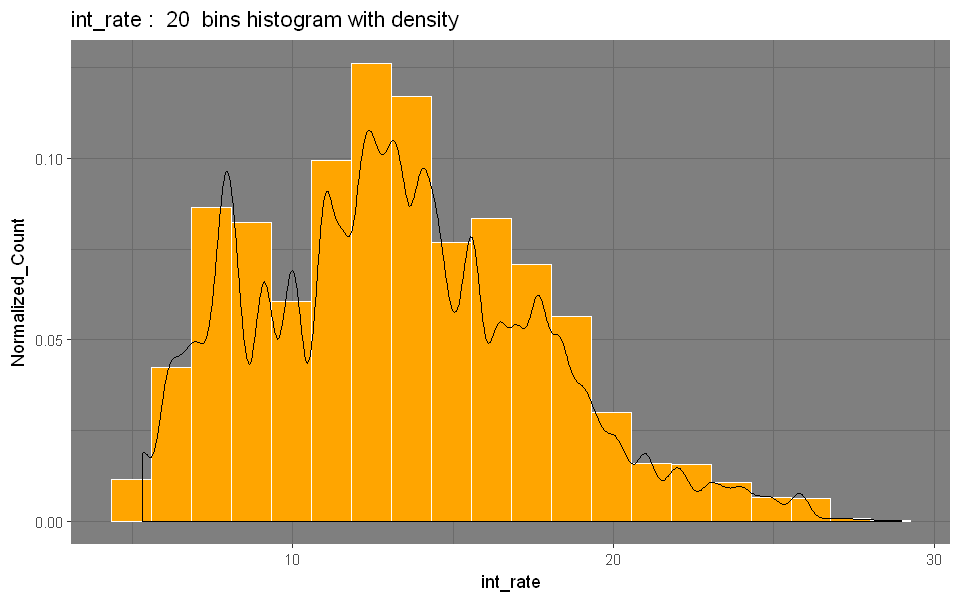

In [73]:
plothistdensity(loan, 20)

In [64]:
mean(loan$annual_inc, na.rm = T)
sd(loan$annual_inc, na.rm = T)
median(loan$annual_inc, na.rm = T)
quantile(loan$annual_inc, c(0.1, 0.25, 0.5, 0.75, 0.9), na.rm = T)

[1] 75027.59

[1] 64698.3

[1] 65000

10%    25%    50%    75%    90% 
 34000  45000  65000  90000 124800

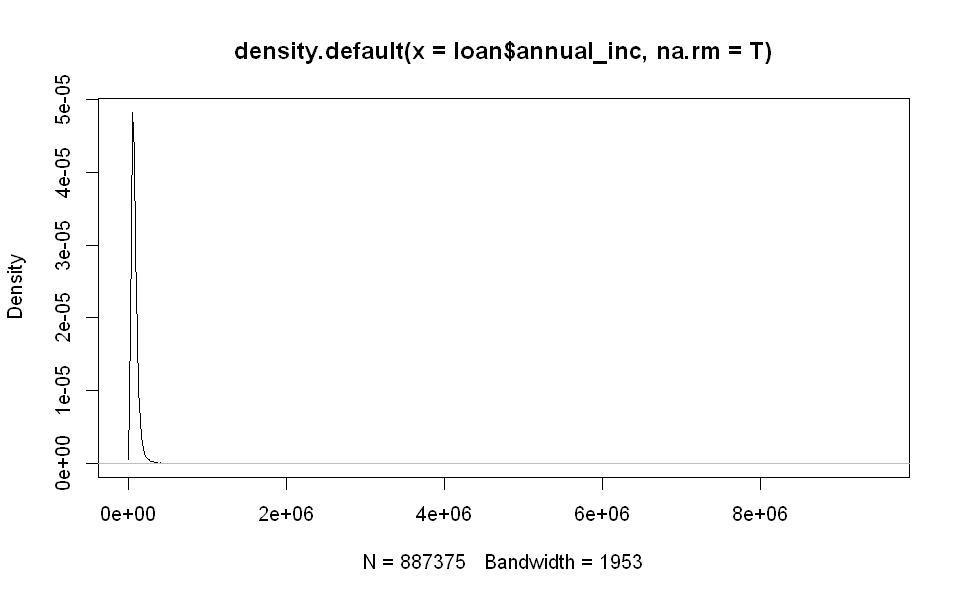

In [74]:
plot(density(loan$annual_inc, na.rm = T))

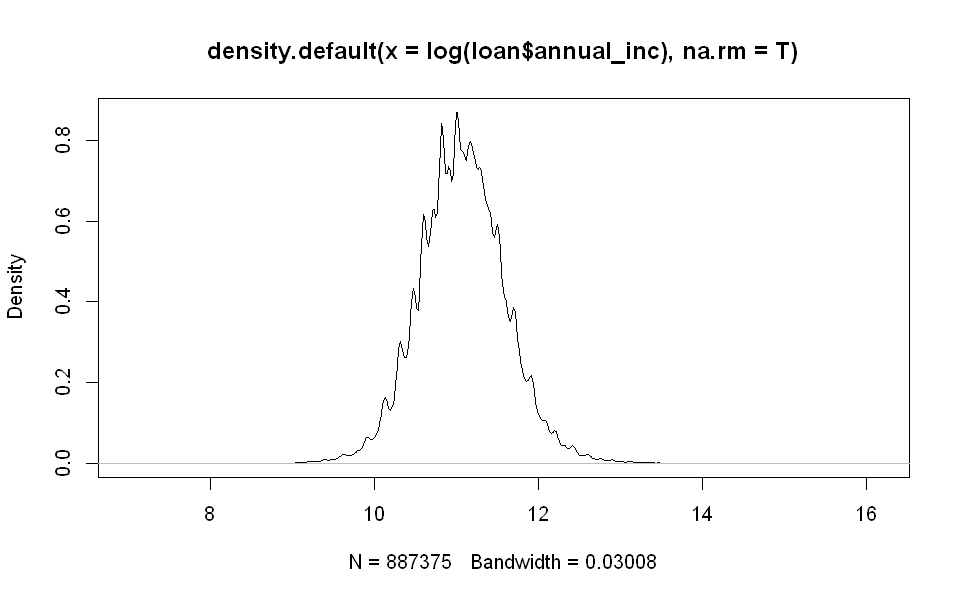

In [75]:
plot(density(log(loan$annual_inc), na.rm = T))

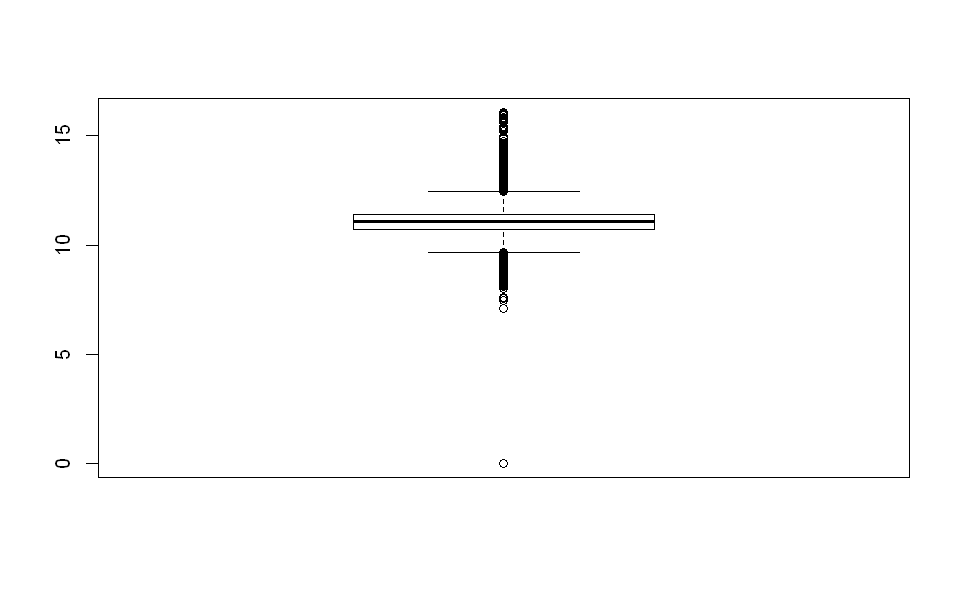

In [76]:
# Q1 - 1.5IQR, Q1, median, Q3, Q3 + 1.5IQR, where IQR is interquartile range: Q3 - Q1
boxplot(log(loan$annual_inc + 1))

In [77]:
# Categorical variables
sort(table(loan$loan_status))


Does not meet the credit policy. Status:Charged Off 
                                                761 
                                            Default 
                                               1219 
 Does not meet the credit policy. Status:Fully Paid 
                                               1988 
                                  Late (16-30 days) 
                                               2357 
                                    In Grace Period 
                                               6253 
                                             Issued 
                                               8460 
                                 Late (31-120 days) 
                                              11591 
                                        Charged Off 
                                              45248 
                                         Fully Paid 
                                             207723 
                                            C

In [78]:
round(sort(table(loan$loan_status)) / dim(loan)[1], 2)


Does not meet the credit policy. Status:Charged Off 
                                               0.00 
                                            Default 
                                               0.00 
 Does not meet the credit policy. Status:Fully Paid 
                                               0.00 
                                  Late (16-30 days) 
                                               0.00 
                                    In Grace Period 
                                               0.01 
                                             Issued 
                                               0.01 
                                 Late (31-120 days) 
                                               0.01 
                                        Charged Off 
                                               0.05 
                                         Fully Paid 
                                               0.23 
                                            C

In [80]:
# remove certain string from loan_status
loan$loan_status = gsub("Does not meet the credit policy. Status:", "", loan$loan_status)

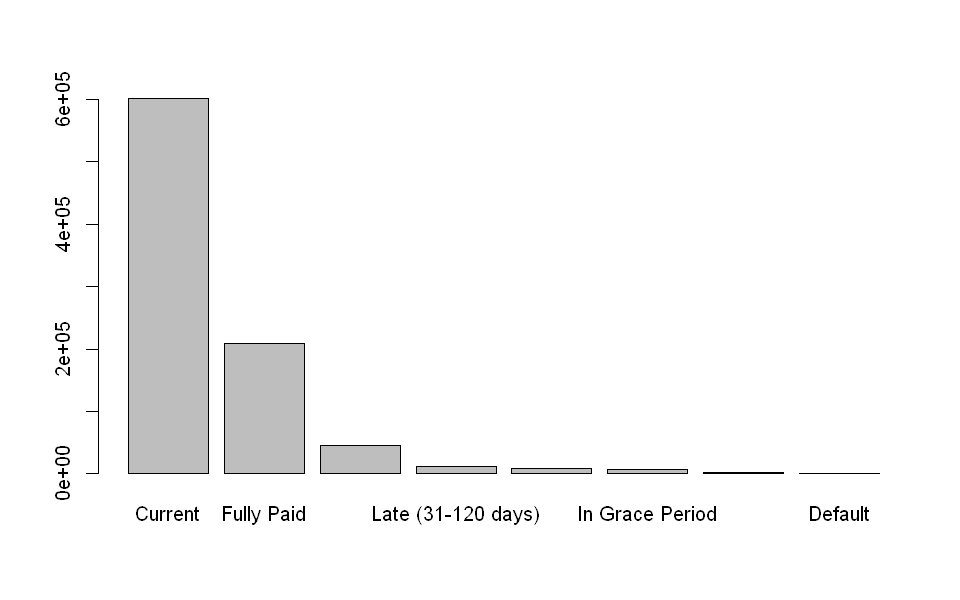

In [81]:
barplot(sort(table(loan$loan_status), decreasing = TRUE))

In [83]:
sort(table(loan$loan_status), decreasing = TRUE)


           Current         Fully Paid        Charged Off Late (31-120 days) 
            601779             209711              46009              11591 
            Issued    In Grace Period  Late (16-30 days)            Default 
              8460               6253               2357               1219 

In [87]:
#generate new features
loan$loan_status_1 = ifelse(loan$loan_status %in% c("'Current","Fully Paid","Issued"), 1, 0)

In [89]:
table(loan$loan_status_1)


     0      1 
669208 218171 

In [90]:
#purpose
sort(table(loan$purpose))


       educational   renewable_energy            wedding              house 
               423                575               2347               3707 
          vacation             moving            medical                car 
              4736               5414               8540               8863 
    small_business     major_purchase              other   home_improvement 
             10377              17277              42894              51829 
       credit_card debt_consolidation 
            206182             524215 

In [91]:
round(sort(table(loan$purpose)) / dim(loan)[1], 2)


       educational   renewable_energy            wedding              house 
              0.00               0.00               0.00               0.00 
          vacation             moving            medical                car 
              0.01               0.01               0.01               0.01 
    small_business     major_purchase              other   home_improvement 
              0.01               0.02               0.05               0.06 
       credit_card debt_consolidation 
              0.23               0.59 

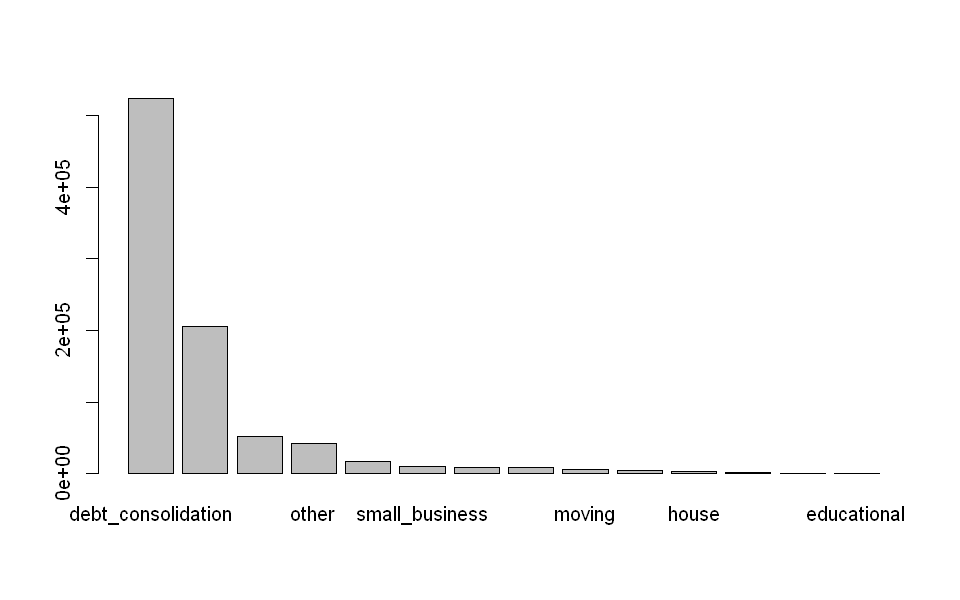

In [93]:
barplot(sort(table(loan$purpose), decreasing = TRUE))

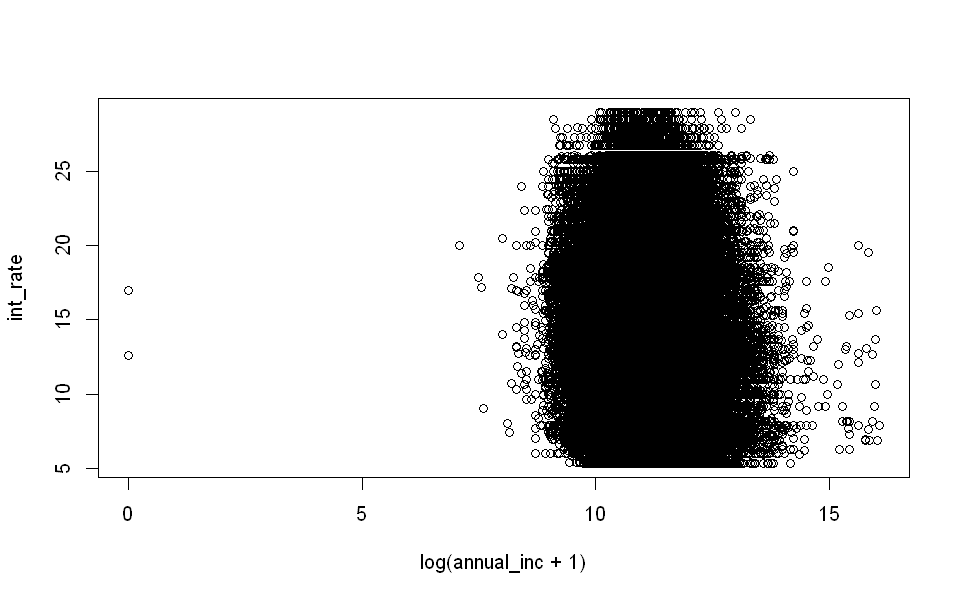

In [94]:
# Numeric variable with numerical response, interest rate
with(loan, plot(log(annual_inc + 1), int_rate))

In [100]:
library(corrplot)
correlations <- cor(loan[, c('int_rate', 'total_acc', 'acc_now_delinq', 'annual_inc',
                             'dti', 'loan_amnt')]) 
correlations

,int_rate,total_acc,acc_now_delinq,annual_inc,dti,loan_amnt
int_rate,1.00000000,NA,NA,NA,0.07990255,0.14502310
total_acc,NA,1,NA,NA,NA,NA
acc_now_delinq,NA,NA,1,NA,NA,NA
annual_inc,NA,NA,NA,1,NA,NA
dti,0.07990255,NA,NA,NA,1.00000000,0.02067549
loan_amnt,0.14502310,NA,NA,NA,0.02067549,1.00000000


In [101]:
# possible to see NA if features has missing value
correlations <- cor(loan[, c('int_rate', 'total_acc', 'acc_now_delinq', 'annual_inc',
                             'dti', 'loan_amnt')], 
                    use = "pairwise.complete.obs")
correlations

,int_rate,total_acc,acc_now_delinq,annual_inc,dti,loan_amnt
int_rate,1.00000000,-0.03861820,0.026478461,-0.07278563,0.079902551,0.145023099
total_acc,-0.03861820,1.00000000,0.026460589,0.18733469,0.108055639,0.222638992
acc_now_delinq,0.02647846,0.02646059,1.000000000,0.01477517,0.003205314,0.003946694
annual_inc,-0.07278563,0.18733469,0.014775175,1.00000000,-0.087409546,0.332697619
dti,0.07990255,0.10805564,0.003205314,-0.08740955,1.000000000,0.020675487
loan_amnt,0.14502310,0.22263899,0.003946694,0.33269762,0.020675487,1.000000000


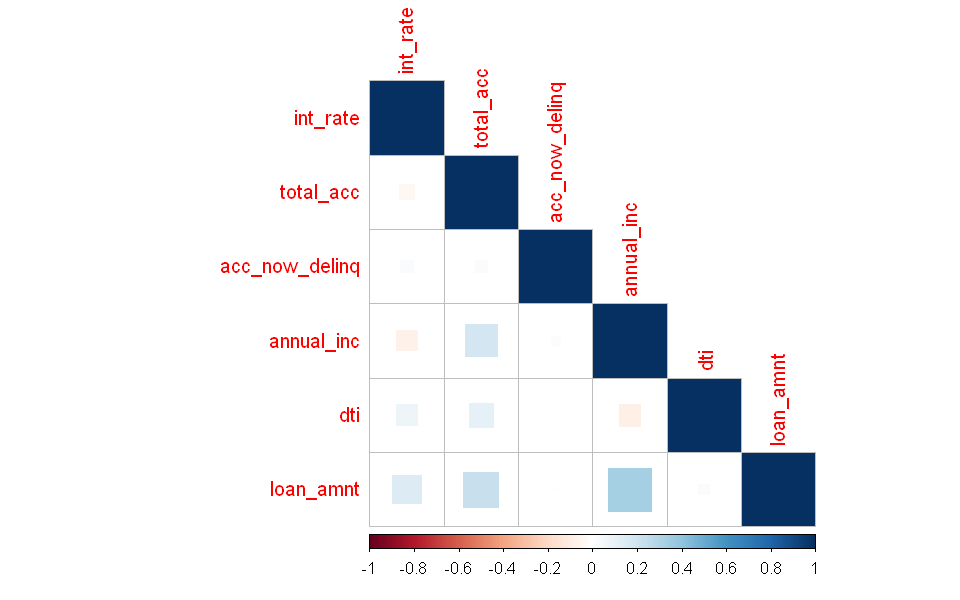

In [102]:
corrplot(correlations, method = "square", tl.cex = 1, type = 'lower')

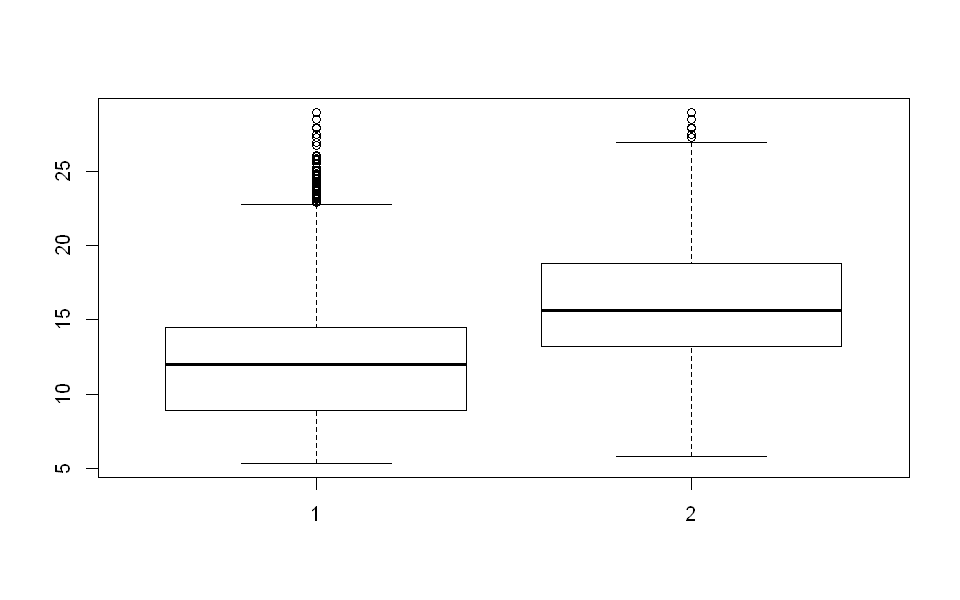

In [103]:
# Categorical variable with numerical response
#int_rate & term
boxplot(subset(loan, term == ' 36 months')$int_rate,
        subset(loan, term == ' 60 months')$int_rate)

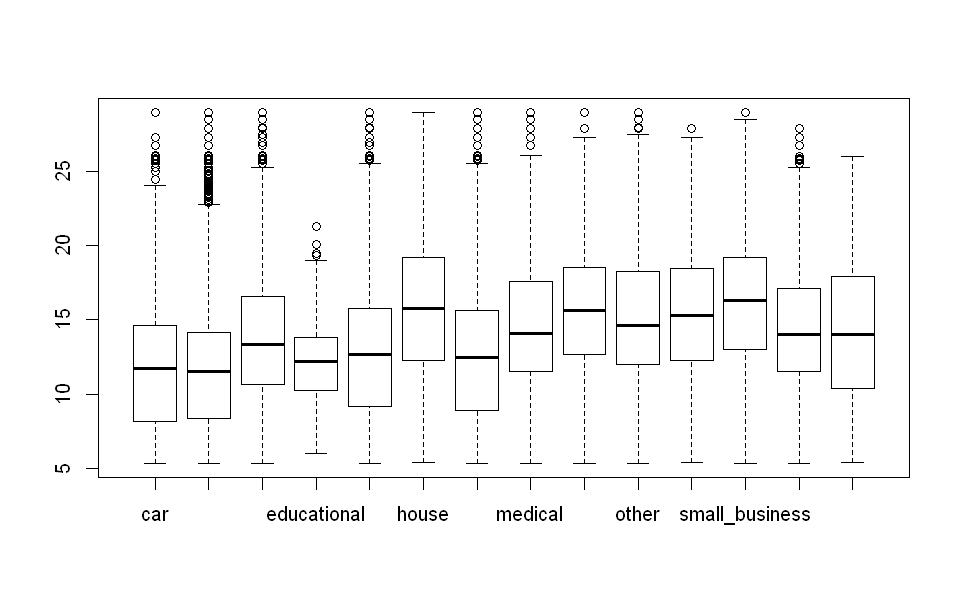

In [104]:
#int_rate and purpose
boxplot(int_rate ~ purpose, data = loan)

In [105]:
#deal with time formate data
library(zoo)
head(loan$issue_d)

Warning message:
"package 'zoo' was built under R version 3.4.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



[1] "Dec-2011" "Dec-2011" "Dec-2011" "Dec-2011" "Dec-2011" "Dec-2011"

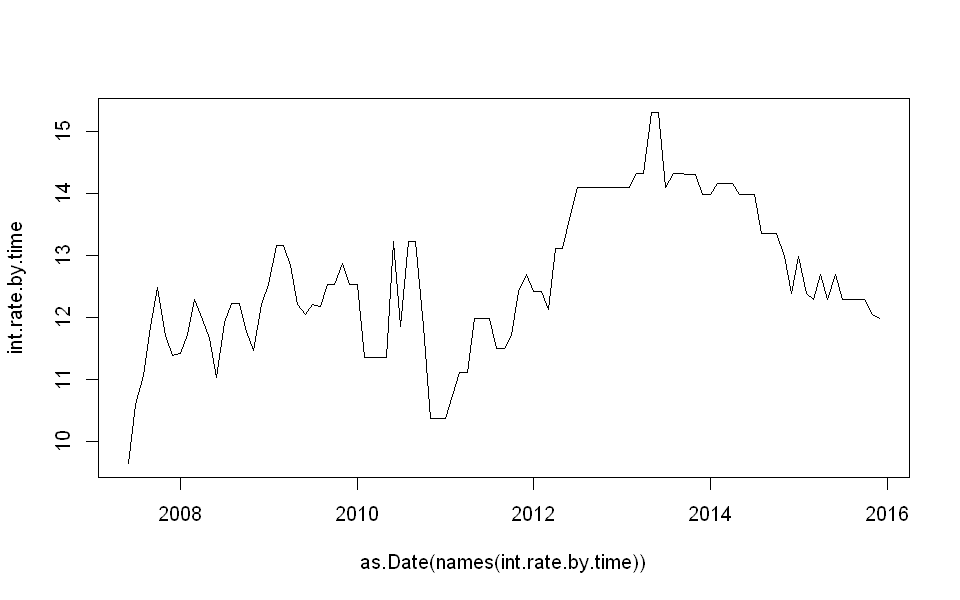

In [106]:
loan$issue_d_1 <- as.Date(as.yearmon(loan$issue_d, "%b-%Y"))
loan$issue_year <- format(loan$issue_d_1, '%Y')
loan$issue_mon <- format(loan$issue_d_1, '%m')
int.rate.by.time <- by(loan, loan$issue_d_1, function(x) {return(median(x$int_rate))})
plot(as.Date(names(int.rate.by.time)), int.rate.by.time, type = 'l')


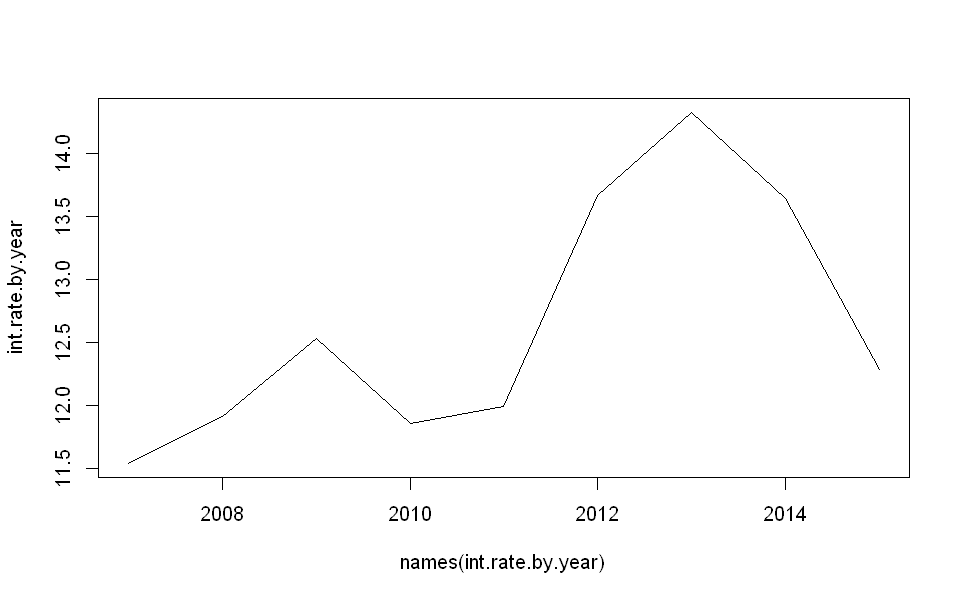

In [107]:
int.rate.by.year <- by(loan, loan$issue_year, function(x) {return(median(x$int_rate))})
plot(names(int.rate.by.year), int.rate.by.year, type = 'l')

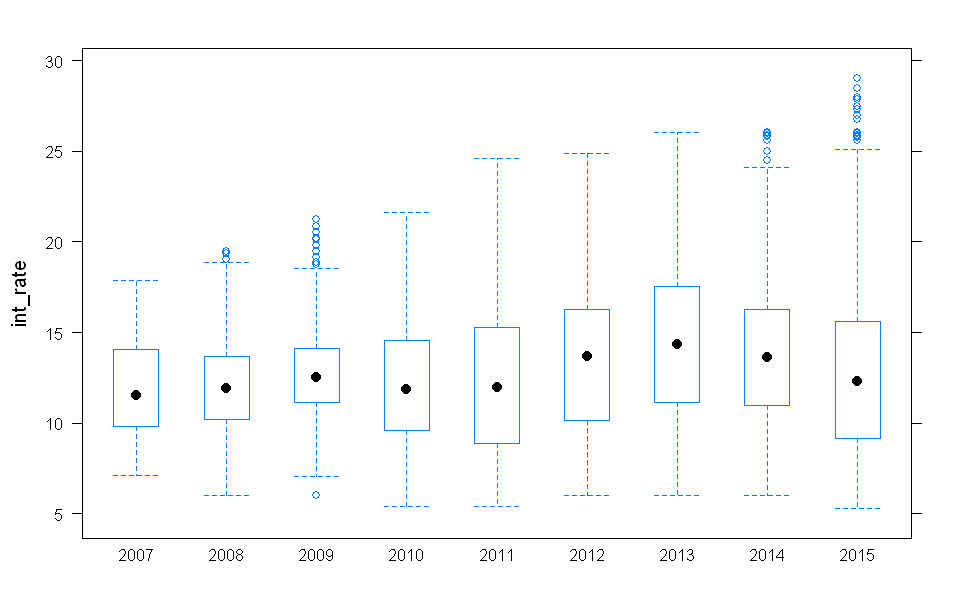

In [108]:
# Not only see the median by time, but also see the distribution by time.
#boxplot of relationship between interest rate and year
library(lattice)
bwplot(int_rate ~ issue_year, data = loan)

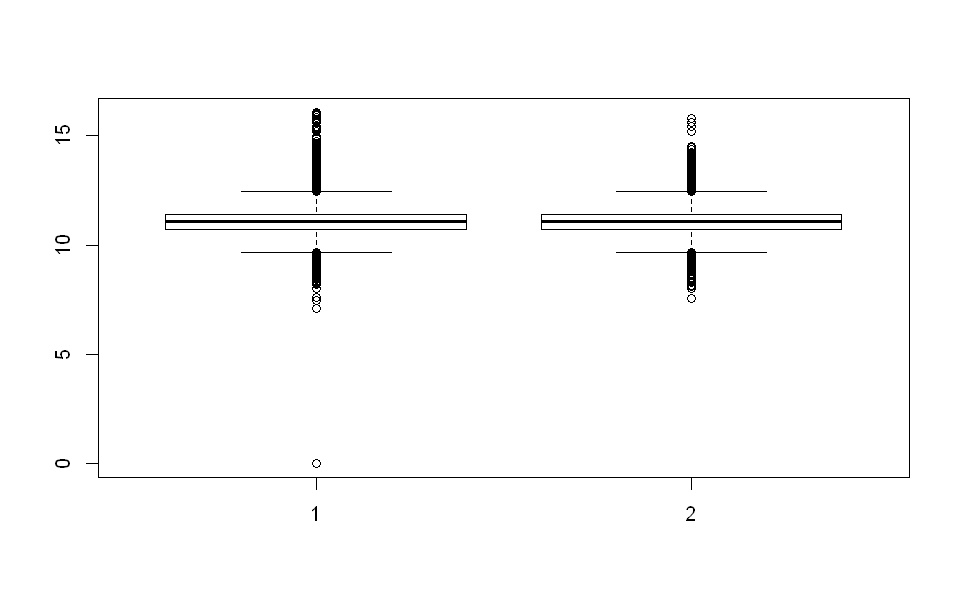

In [109]:
# Numeric variable with categorical response
#isssued and not issued
boxplot(log(subset(loan, loan_status_1 == 0)$annual_inc + 1),
        log(subset(loan, loan_status_1 == 1)$annual_inc + 1))

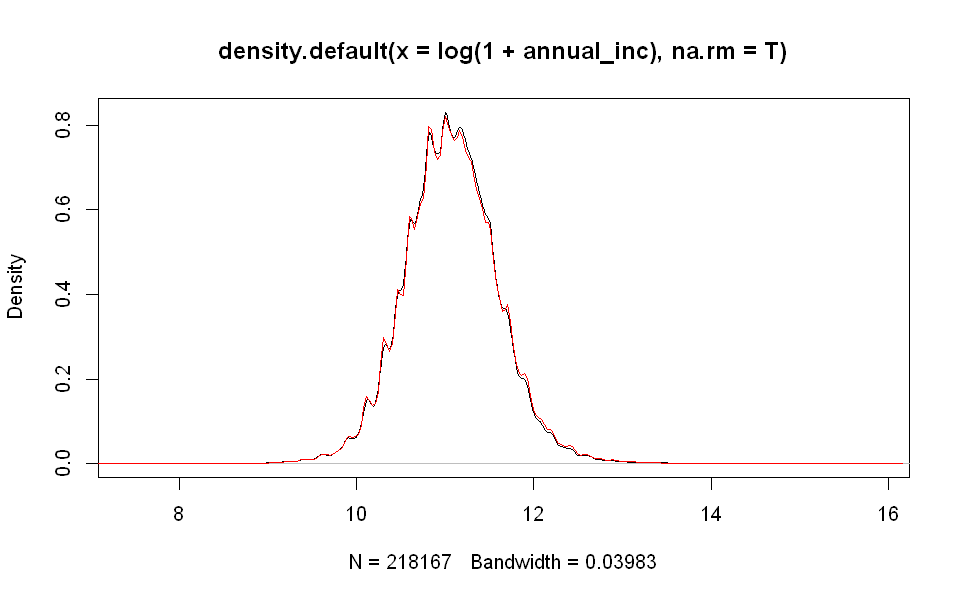

In [119]:
#issued loan annual income
with(subset(loan, loan_status_1 == 1), plot(density(log(1 + annual_inc), na.rm=T)))
with(subset(loan, loan_status_1 == 0), lines(density(log(1 + annual_inc)), col = 'red'))

In [120]:
# Categorical variable with categorical response
table(loan$loan_status_1, loan$purpose)
table(loan$loan_status_1, loan$purpose) / as.numeric(table(loan$loan_status_1))


   
       car credit_card debt_consolidation educational home_improvement  house
  0   5533      161590             397847          89            38533   2271
  1   3330       44592             126368         334            13296   1436
   
    major_purchase medical moving  other renewable_energy small_business
  0          11602    6128   3728  30770              354           6801
  1           5675    2412   1686  12124              221           3576
   
    vacation wedding
  0     3348     614
  1     1388    1733

   
             car  credit_card debt_consolidation  educational home_improvement
  0 0.0082679825 0.2414645372       0.5945042498 0.0001329930     0.0575800050
  1 0.0152632568 0.2043901343       0.5792153861 0.0015309092     0.0609430218
   
           house major_purchase      medical       moving        other
  0 0.0033935637   0.0173369117 0.0091570932 0.0055707642 0.0459797253
  1 0.0065819930   0.0260117064 0.0110555482 0.0077278832 0.0555710887
   
    renewable_energy small_business     vacation      wedding
  0     0.0005289835   0.0101627596 0.0050029288 0.0009175025
  1     0.0010129669   0.0163908127 0.0063619821 0.0079433105

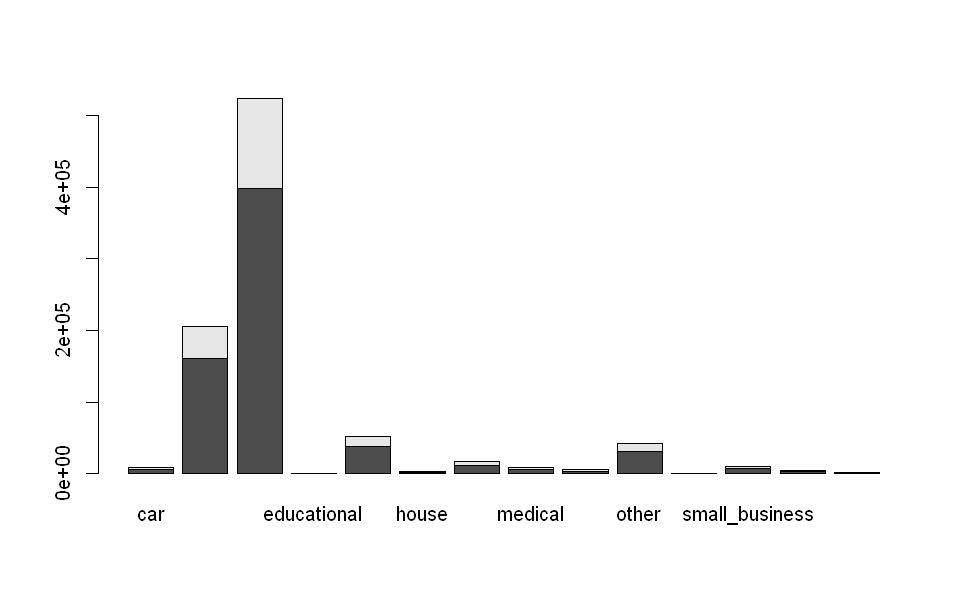

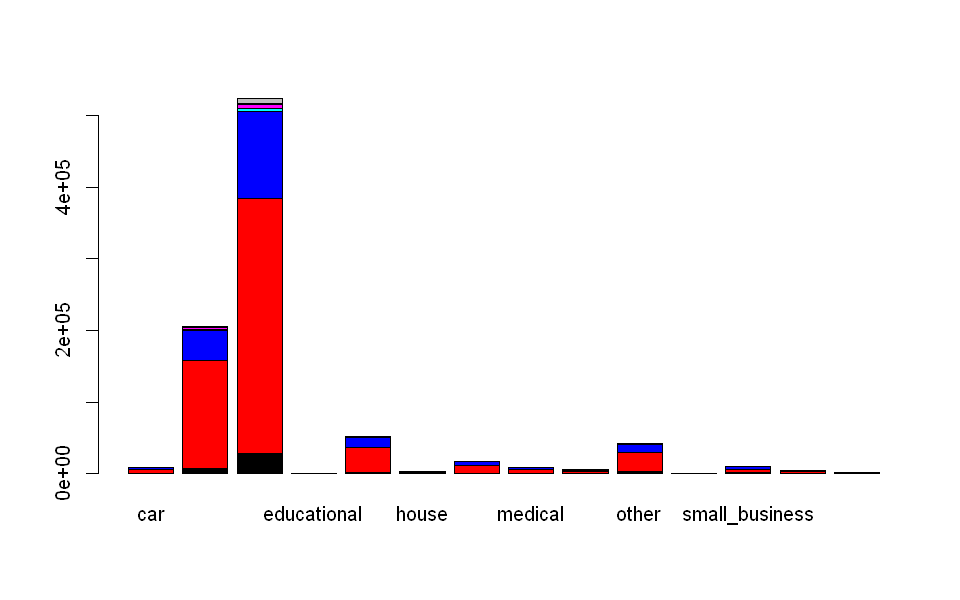

In [121]:
barplot(table(loan$loan_status_1, loan$purpose))
barplot(table(loan$loan_status, loan$purpose), col = c(1:14))

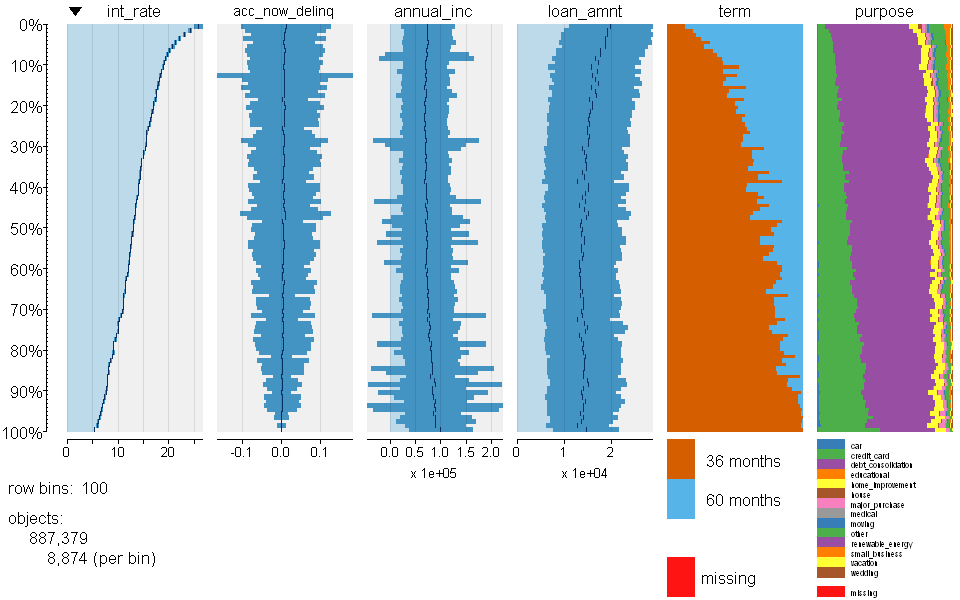

In [124]:
#no matter it is numerical or categorical
library(tabplot)
tableplot(loan, select = c('int_rate', 'acc_now_delinq', 'annual_inc',
                           'loan_amnt', 'term', 'purpose'))

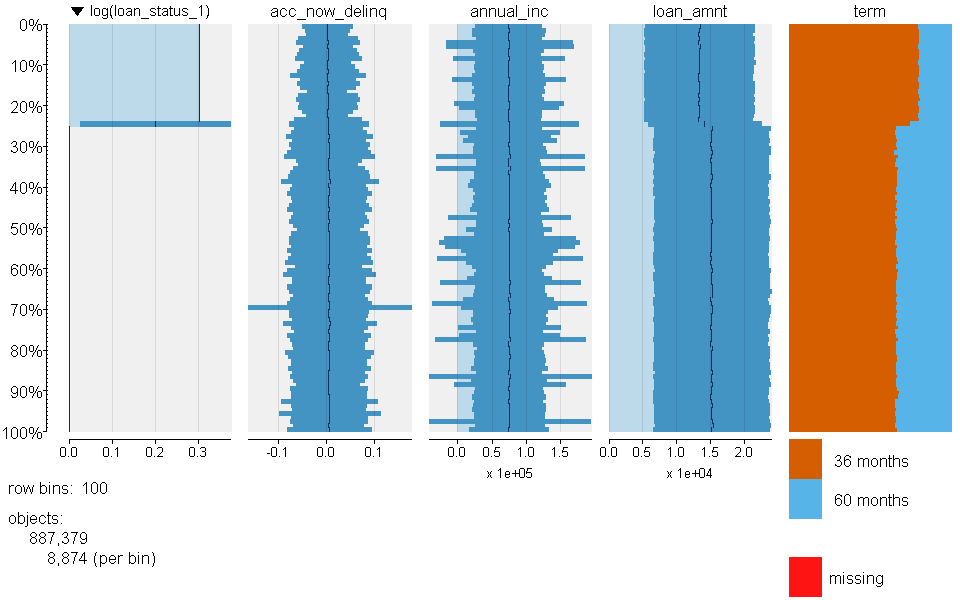

In [125]:
tableplot(loan, select = c('loan_status_1', 'acc_now_delinq', 'annual_inc',
                           'loan_amnt', 'term'))